IMAGENET-C_model_performance.ipynb

Data directories:

In [ ]:
######################### Insert_here

In [1]:
base_dir = base_dir_path
IMAGENET_C_data = IMAGENET_C_data_path
Subcategory_IMAGENET_C_files = Subcategory_IMAGENET_C_files_path

In [2]:
real_data = real_data

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import os
from scipy import stats 
from scipy import fftpack
import cv2
import glob
import pickle
import seaborn as sns
# from math import nan, isnan
import copy

In [4]:
from torchvision import models, transforms, datasets
import torch

C:\Users\lauraa.omahony\Anaconda3\envs\First_digit_experiments\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [104]:
# change
category = "weather" ################# CHANGE FOR DATASET ####################
subcategory = "fog" ################# CHANGE FOR DATASET ####################
# severity = "1" ################# CHANGE FOR DATASET ####################

In [105]:
vgg16_model= models.vgg16(pretrained=True)
model = models.alexnet(pretrained=True)

In [106]:
data_transforms = transforms.Compose([transforms.Resize(256), 
                                    transforms.CenterCrop(224), 
                                    transforms.ToTensor(), 
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [107]:
data_subcategory = f'/{category}/{subcategory}/'

### severity 1

In [108]:
severity = "1" ################# CHANGE FOR DATASET ####################

In [109]:
image_datasets = datasets.ImageFolder(IMAGENET_C_data+data_subcategory+severity, 
                                      data_transforms)
dataloaders = torch.utils.data.DataLoader(image_datasets, batch_size=50,
                                             shuffle=True, num_workers=4)
              
dataset_sizes = len(image_datasets)
class_names = image_datasets.classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

n=1000
#dataset_subset = torch.utils.data.Subset(image_datasets, np.random.choice(len(image_datasets), n, replace=False))
sampler = torch.utils.data.RandomSampler(image_datasets, replacement=True, num_samples=n)
dataset_subset = torch.utils.data.DataLoader(image_datasets, sampler=sampler, batch_size=50,
                                             num_workers=4)

In [110]:
model.eval()
running_corrects = 0
for inputs, labels in dataset_subset: # dataloaders:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    running_corrects += torch.sum(preds == labels.data)
    # if n % 100==0: print(running_corrects)
# epoch_acc = running_corrects.double() / dataset_sizes

In [111]:
running_corrects

tensor(303)

In [112]:
epoch_acc = running_corrects.double() / n

In [113]:
epoch_acc

tensor(0.3030, dtype=torch.float64)

### severity 3

In [114]:
severity = "3" ################# CHANGE FOR DATASET ####################

In [115]:
image_datasets = datasets.ImageFolder(IMAGENET_C_data+data_subcategory+severity, 
                                      data_transforms)
dataloaders = torch.utils.data.DataLoader(image_datasets, batch_size=50,
                                             shuffle=True, num_workers=4)
              
dataset_sizes = len(image_datasets)
class_names = image_datasets.classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

n=1000
#dataset_subset = torch.utils.data.Subset(image_datasets, np.random.choice(len(image_datasets), n, replace=False))
sampler = torch.utils.data.RandomSampler(image_datasets, replacement=True, num_samples=n)
dataset_subset = torch.utils.data.DataLoader(image_datasets, sampler=sampler, batch_size=50,
                                             num_workers=4)

In [116]:
model.eval()
running_corrects = 0
for inputs, labels in dataset_subset: # dataloaders:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    running_corrects += torch.sum(preds == labels.data)
    # print(running_corrects)
# epoch_acc = running_corrects.double() / dataset_sizes

In [117]:
running_corrects

tensor(136)

In [118]:
epoch_acc = running_corrects.double() / n

In [119]:
epoch_acc

tensor(0.1360, dtype=torch.float64)

### severity 5

In [120]:
severity = "5" ################# CHANGE FOR DATASET ####################

In [121]:
image_datasets = datasets.ImageFolder(IMAGENET_C_data+data_subcategory+severity, 
                                      data_transforms)
dataloaders = torch.utils.data.DataLoader(image_datasets, batch_size=50,
                                             shuffle=True, num_workers=4)
              
dataset_sizes = len(image_datasets)
class_names = image_datasets.classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

n=1000
#dataset_subset = torch.utils.data.Subset(image_datasets, np.random.choice(len(image_datasets), n, replace=False))
sampler = torch.utils.data.RandomSampler(image_datasets, replacement=True, num_samples=n)
dataset_subset = torch.utils.data.DataLoader(image_datasets, sampler=sampler, batch_size=50,
                                             num_workers=4)

In [122]:
model.eval()
running_corrects = 0
for inputs, labels in dataset_subset: # dataloaders:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    running_corrects += torch.sum(preds == labels.data)
    # print(running_corrects)
# epoch_acc = running_corrects.double() / dataset_sizes

In [123]:
running_corrects

tensor(33)

In [124]:
epoch_acc = running_corrects.double() / n

In [125]:
epoch_acc 

tensor(0.0330, dtype=torch.float64)

### plots

In [5]:
# Alexnet 1000 samples
gaussian_noise = [0.633,0.321, 0.0560, 0.005]
glass_blur = [0.633,0.3440,0.1040,0.0610]
contrast = [0.633,0.3090,0.0960,0.0040]
fog = [0.633,0.3030,0.1360,0.0330]

accs_all = []

accs_all.append(gaussian_noise)
accs_all.append(glass_blur)
accs_all.append(contrast)
accs_all.append(fog) 

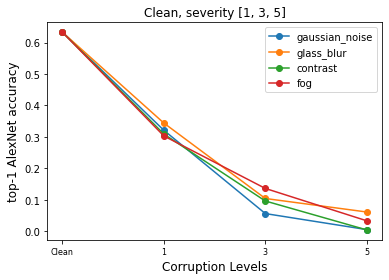

In [7]:
corruption_levels = [1,3,5]
Imagenet_corruption_levels = ["Clean",1,3,5]

plt.xlabel('Corruption Levels', fontsize=12)
plt.ylabel('top-1 AlexNet accuracy', fontsize=12)
plt.title(label = f"Clean, severity {corruption_levels}", fontsize=12) 
plt.xticks([0, 1, 2, 3], Imagenet_corruption_levels, fontsize=8)
plt.plot(accs_all[0], marker='o')
plt.plot(accs_all[1], marker='o')
plt.plot(accs_all[2], marker='o')
plt.plot(accs_all[3], marker='o')
plt.legend(['gaussian_noise', 'glass_blur', 'contrast', 'fog'])

Inference times...:

https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/ 

Do top 5 accuracies for all categories and severities. 

https://gist.github.com/weiaicunzai/2a5ae6eac6712c70bde0630f3e76b77b

https://www.researchgate.net/figure/Top-5-accuracy-top-1-accuracy-and-the-number-of-parameters-of-AlexNet-VGG-Inception_tbl1_339991922 

https://www.researchgate.net/figure/ImageNet-C-Corruption-Groups-Accuracy-of-ViT-and-ResNet-models-on-ILSVRC-2012-clean_fig4_350457424 

